In [130]:
from storage_utils import load_logbook, load_strategy, load_summary, load_logbook_df, load_strategy_df, set_storage_dir_path_exact
import storage_utils

In [150]:
set_storage_dir_path_exact('./remote_results/commission0_003perc_2024-05-18_17-33-14-977267')
print(storage_utils.STORAGE_DIR_PATH)

./remote_results/commission0_003perc_2024-05-18_17-33-14-977267


In [132]:
# load_summary('ea')

In [133]:
load_summary('cmaes')

,path,initial_money,commision,result,n_generations,execution_time
47,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,17533.112948,3981,1032.849159
67,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,15264.074225,2352,612.567614
13,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,13528.546206,3007,984.580349
60,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,13226.782801,2205,573.830855
19,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,13038.376395,2182,749.710917
...,...,...,...,...,...,...
64,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,4827.267216,1221,317.664150
36,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,4558.069689,1404,373.952943
35,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,3485.944393,122,32.966904
7,/net/ascratch/people/plgproman/storage/commiss...,1000,0.003,3141.177178,176,47.971298


In [187]:
DUMP_DIR_PATH = './remote_results/commission0_001perc_2024-05-19_07-57-03-469936/cmaes_2024-05-19_08-08-38-178270'
# DATASET = "./data/wig_d.csv"
DATASET = "./data/pkn_d.csv"
INITIAL_MONEY = 1000
COMMISSION = 0.001

In [188]:
load_logbook_df(DUMP_DIR_PATH)

,gen,nevals,restart,sigma,avg,std,min,max
0,0,50,0,950.832193,688.121351,374.624633,80.042793,1432.261063
1,1,50,0,914.257736,960.534518,344.638847,112.676316,1968.931104
2,2,50,0,888.083398,1008.413121,422.846508,163.267706,2146.525199
3,3,50,0,867.517603,1038.909484,247.918054,547.705758,2088.339724
4,4,50,0,853.851987,1221.419265,329.828911,590.260911,1999.042482
...,...,...,...,...,...,...,...,...
2437,2437,50,0,44.623079,128976.255299,0.000000,128976.255299,128976.255299
2438,2438,50,0,44.469725,128953.971988,155.983174,127862.089768,128976.255299
2439,2439,50,0,44.337444,128976.255299,0.000000,128976.255299,128976.255299
2440,2440,50,0,44.232824,128976.255299,0.000000,128976.255299,128976.255299


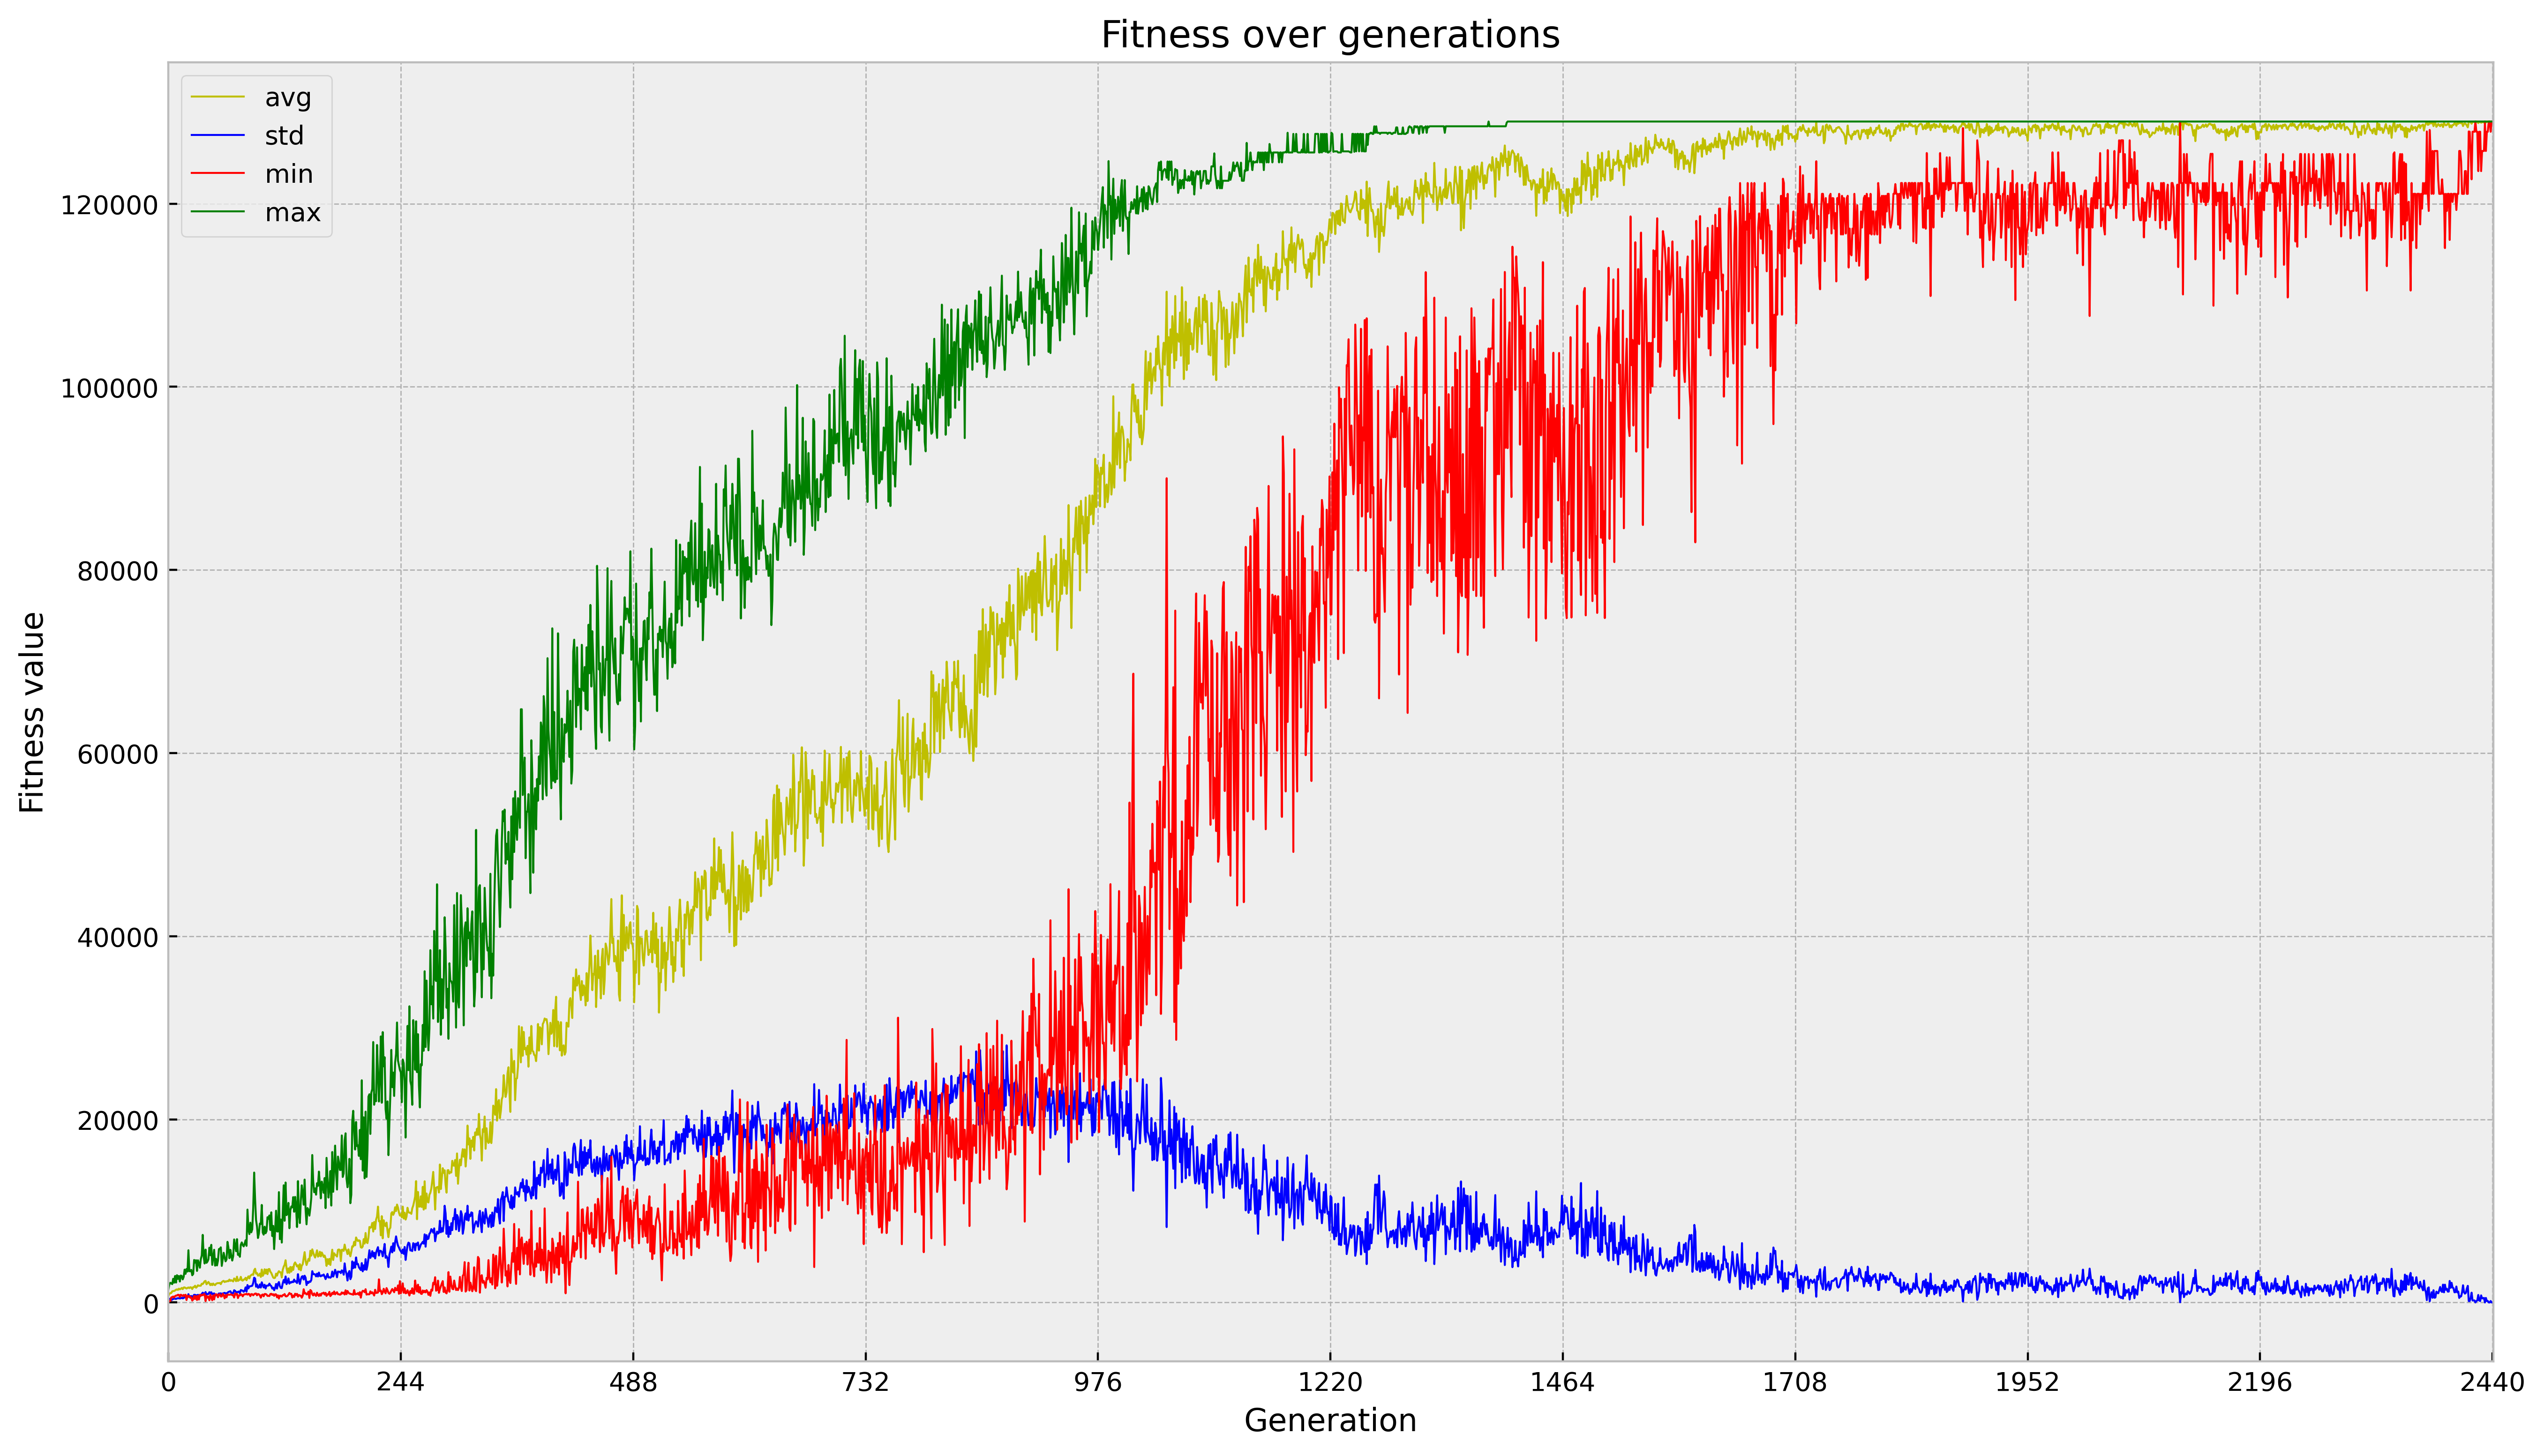

In [189]:
from strategy_visualizer import plot_fitness_over_generations

logbook = load_logbook(DUMP_DIR_PATH)
plot_fitness_over_generations(logbook)

In [190]:
load_strategy_df(DUMP_DIR_PATH)

,feature,buy strategy weight,sell strategy weight
0,volume_adi,622.295484,-4330.986794
1,volume_obv,-13392.708903,-4739.995599
2,volume_cmf,2951.373473,1770.830963
3,volume_fi,16.749824,2714.007081
4,volume_em,9564.611457,78.985467
...,...,...,...
72,momentum_pvo_signal,-4311.236289,-3868.248571
73,momentum_pvo_hist,10822.507894,10016.207184
74,momentum_kama,-15417.946400,1936.958185
75,others_dr,819.041182,16287.767440


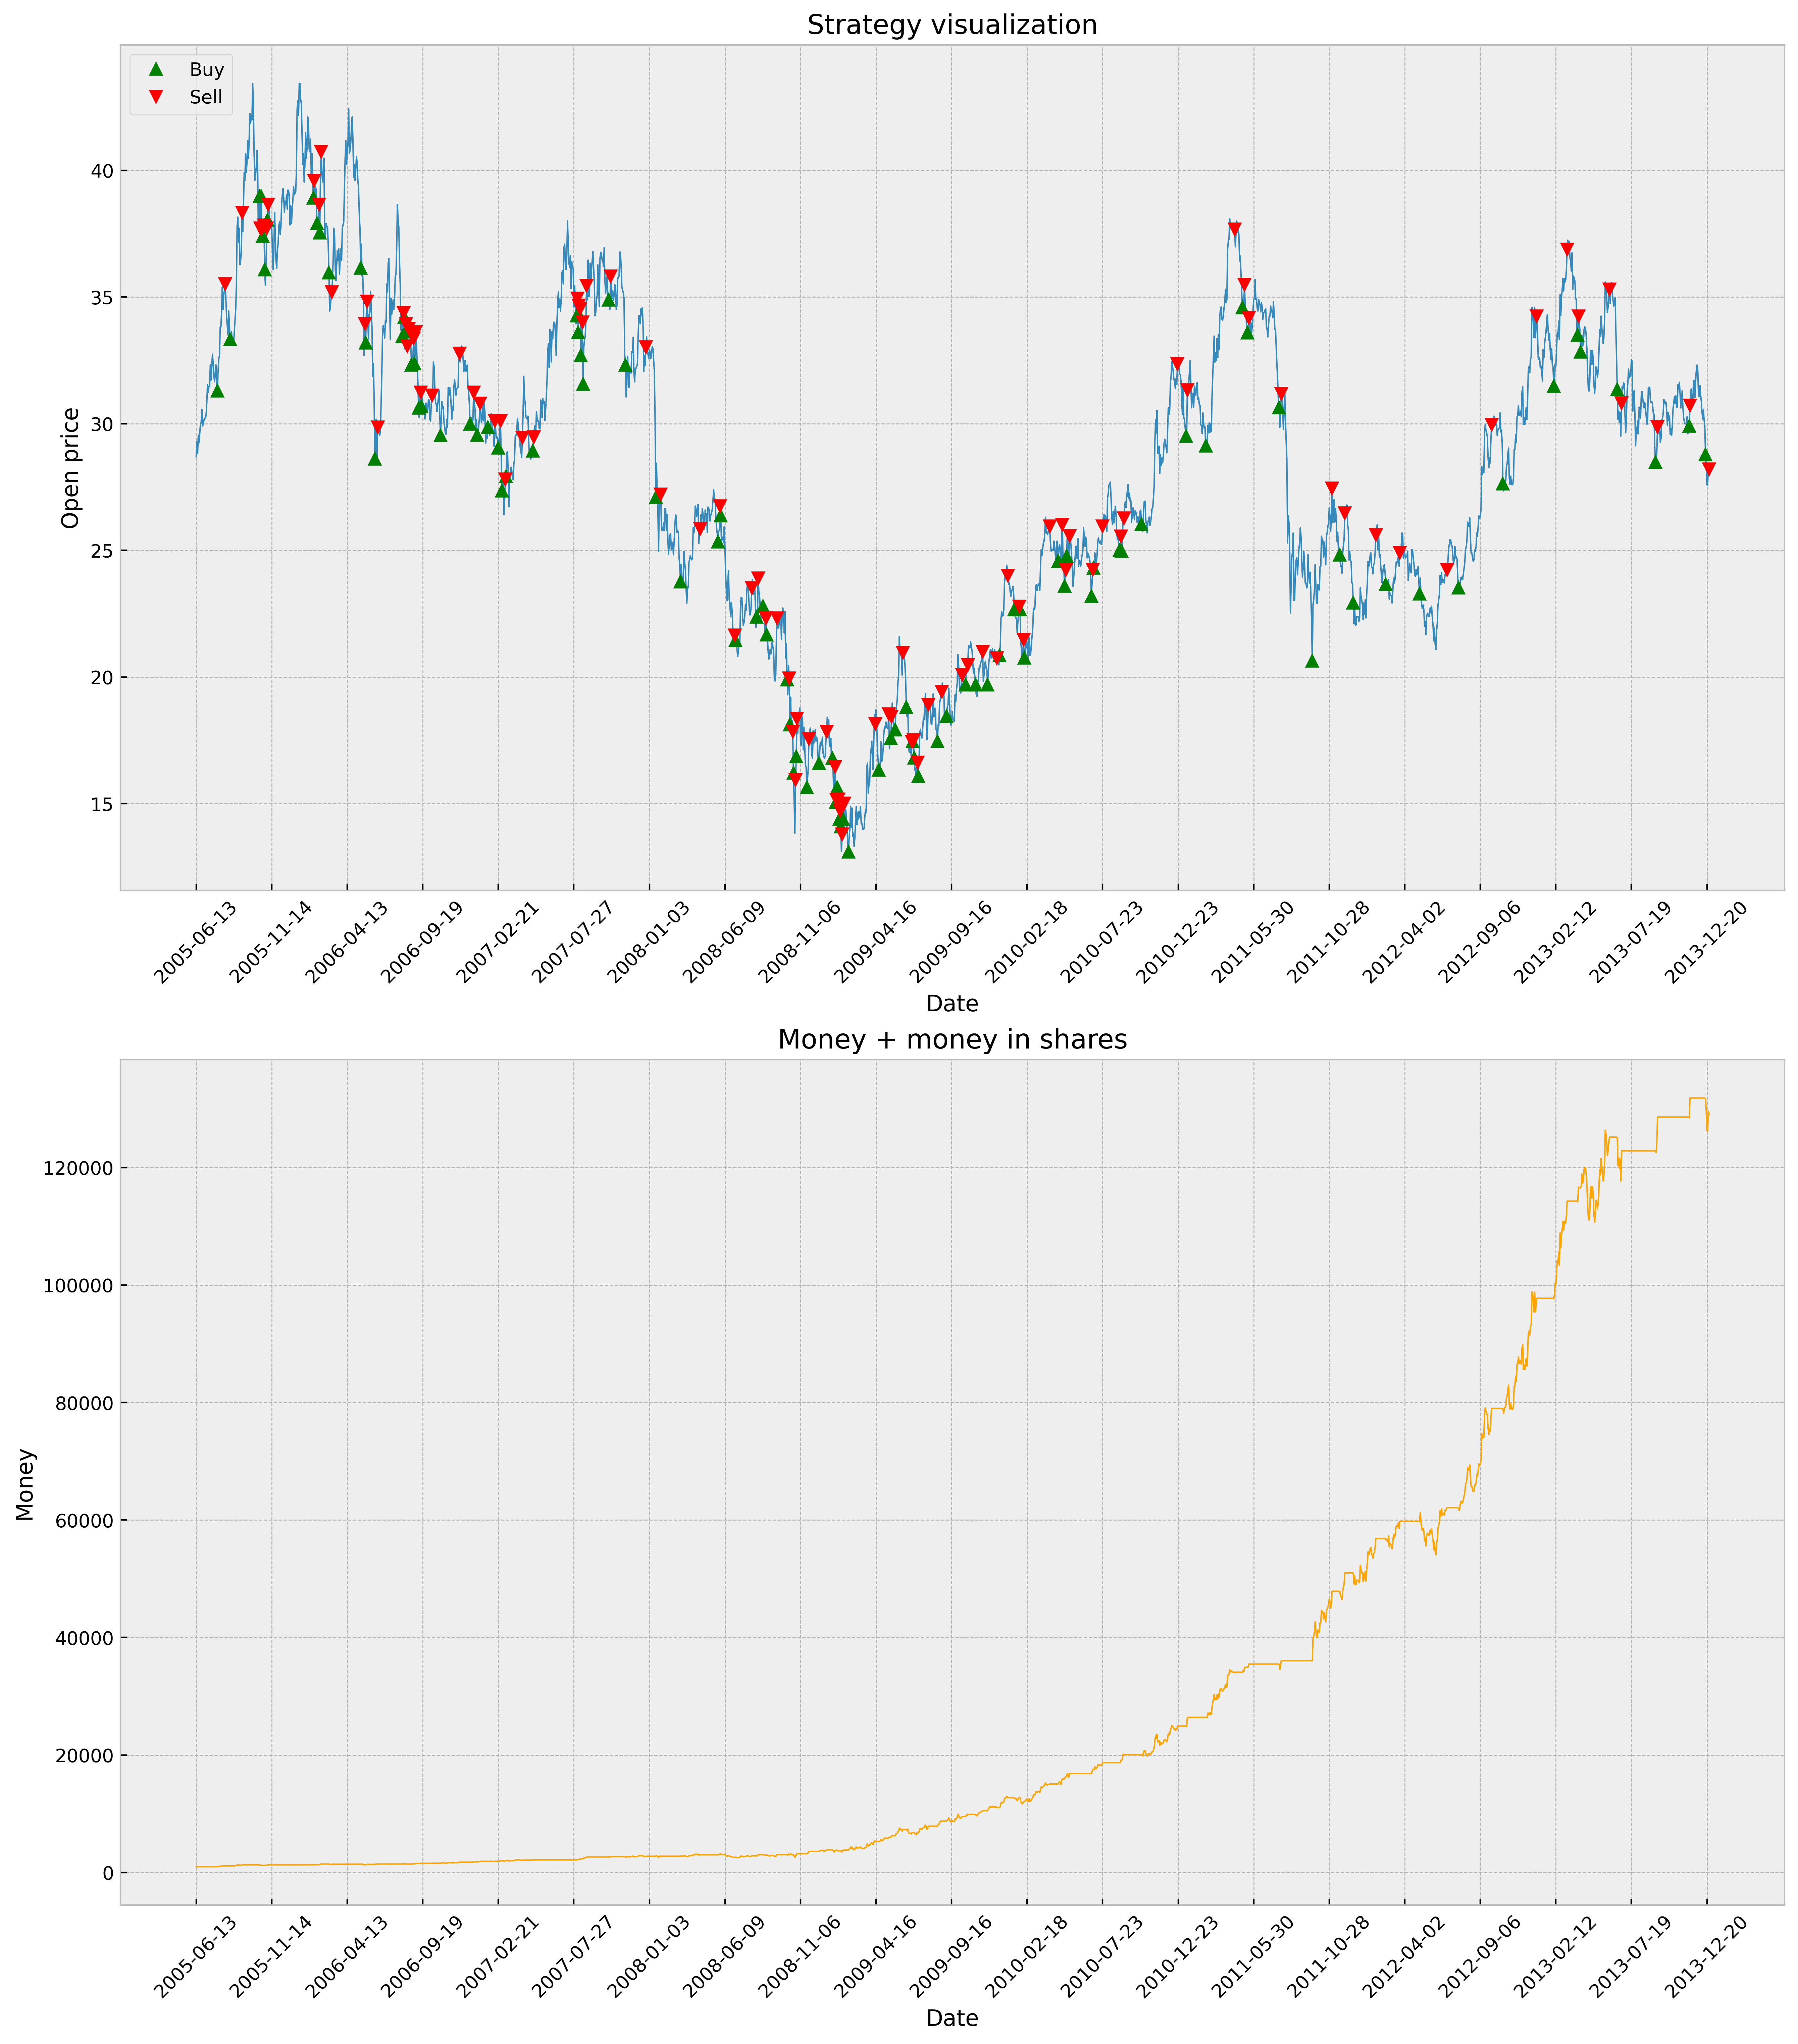

In [191]:
from preprocessing import preprocess_data
from strategy_visualizer import plot_strategy, simulate_strategy

strategy = load_strategy(DUMP_DIR_PATH)
stock_data, ta_features, _ = preprocess_data(DATASET)

dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)